You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

### 1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data=pd.read_csv('diabetes.csv')

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# Calculate the correlation matrix
correlation = data.corr()

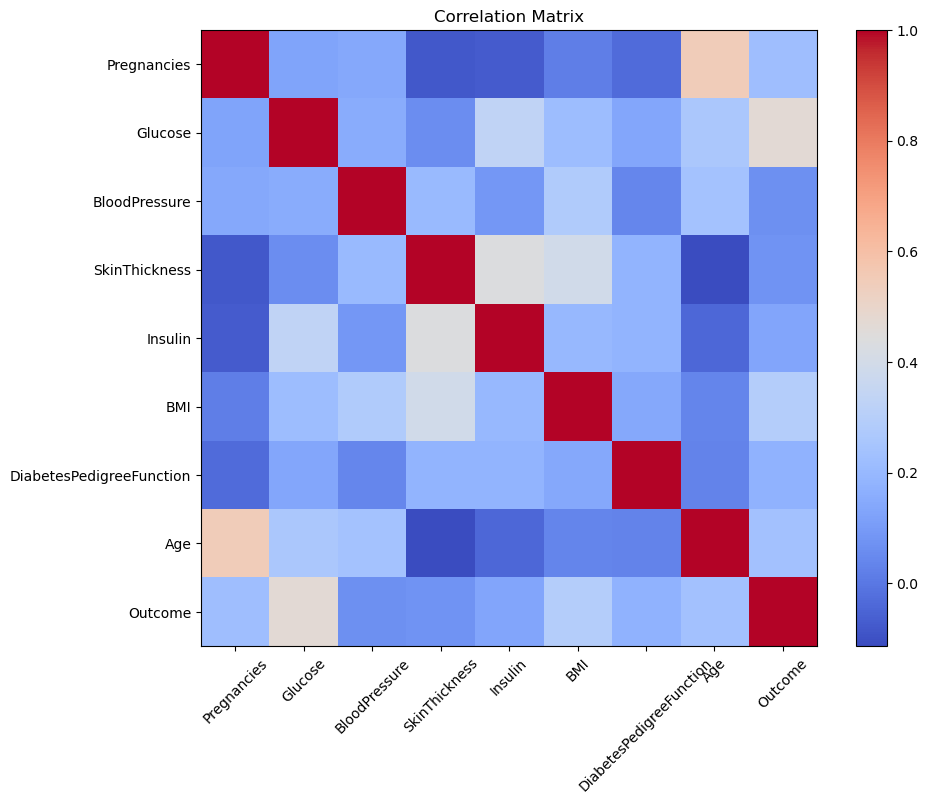

In [16]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
plt.imshow(correlation, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()

### 2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

<AxesSubplot: >

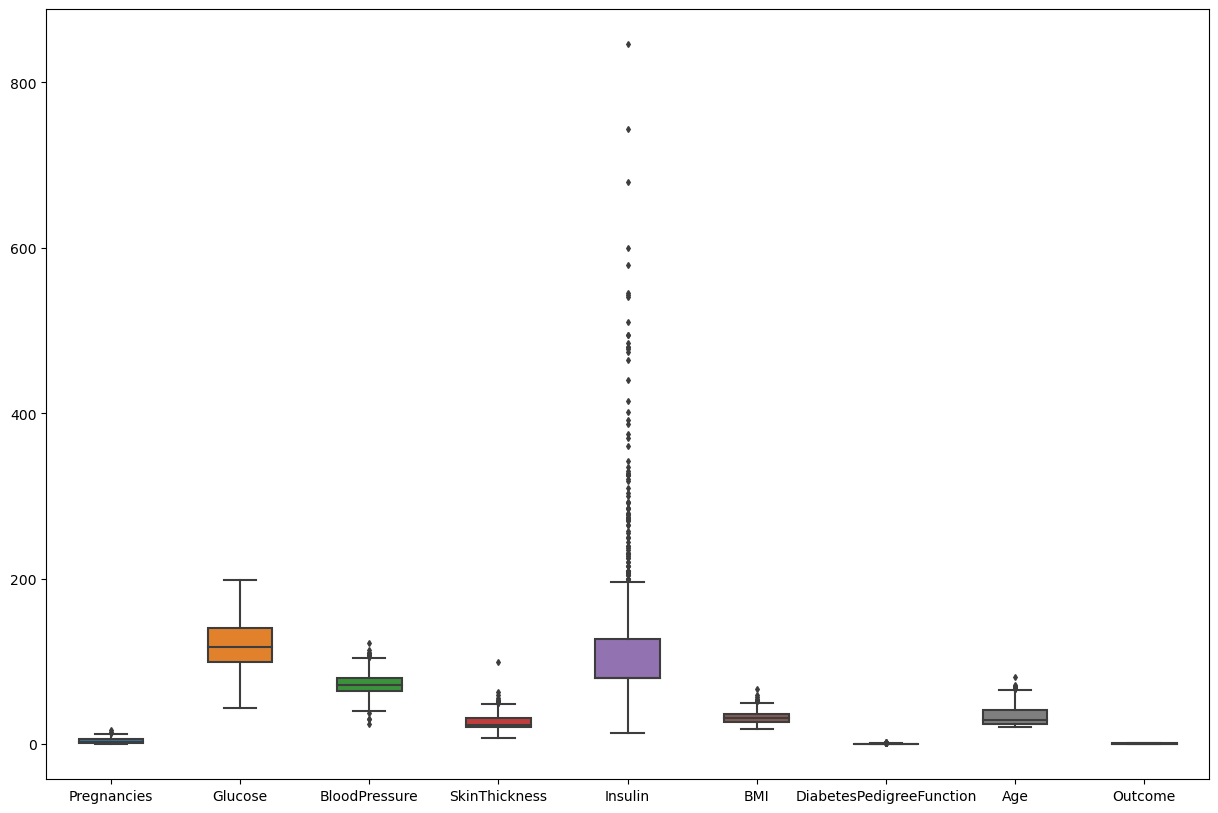

In [19]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [20]:
# Removing outliers
# Define the boundaries for outliers using z-score method
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
z_threshold = 3  
z_scores = (data[num_cols] - data[num_cols].mean()) / data[num_cols].std()
data = data[(z_scores.abs() < z_threshold).all(axis=1)]

# Transforming categorical variables into dummy variables 
data = pd.get_dummies(data, columns=['Outcome'], drop_first=True)

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


### 3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [22]:
#segregate the dependent and independent variable
X = data.drop(columns = ['Outcome_1'])
y = data['Outcome_1']

In [23]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
classifier=DecisionTreeClassifier(criterion='entropy')

In [25]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
696,3,169.0,74.0,19.000000,125.000000,29.9,0.268,31
404,5,168.0,64.0,20.536458,79.799479,32.9,0.135,41
530,2,122.0,60.0,18.000000,106.000000,29.8,0.717,22
519,6,129.0,90.0,7.000000,326.000000,19.6,0.582,60
87,2,100.0,68.0,25.000000,71.000000,38.5,0.324,26


In [27]:
# Define the hyperparameters to optimize
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X, y)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_hyperparameters = grid_search.best_params_

# Print the best hyperparameters found
print(best_model)
print(best_hyperparameters)

# Train the decision tree model using the best hyperparameters on the full training set
best_model.fit(X, y)

# Predict on the training set
y_train_pred = best_model.predict(X)

# Evaluate the accuracy of the model on the training set
train_accuracy = accuracy_score(y, y_train_pred)
print("Training Accuracy:", train_accuracy)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training Accuracy: 0.8272980501392758


### 5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Test Set Metrics:
Accuracy: 0.869198312236287
Precision: 0.8571428571428571
Recall: 0.676056338028169
F1 Score: 0.7559055118110235
Confusion Matrix:
[[158   8]
 [ 23  48]]


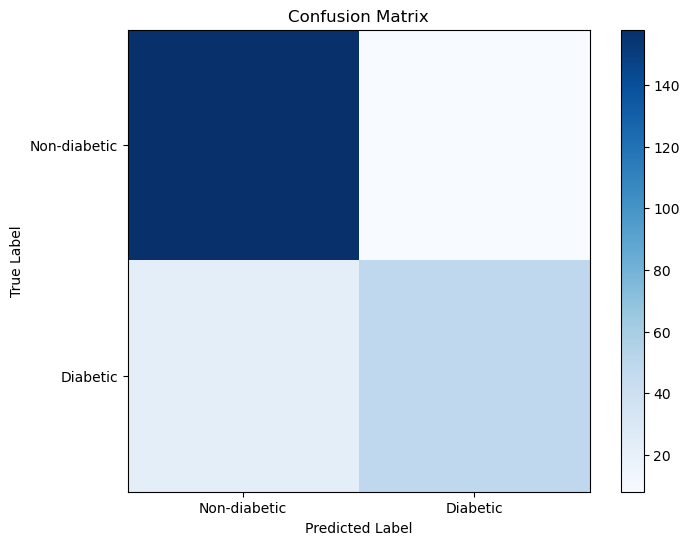

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict on the test set
y_test_pred = tree_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Test Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
labels = ['Non-diabetic', 'Diabetic']
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


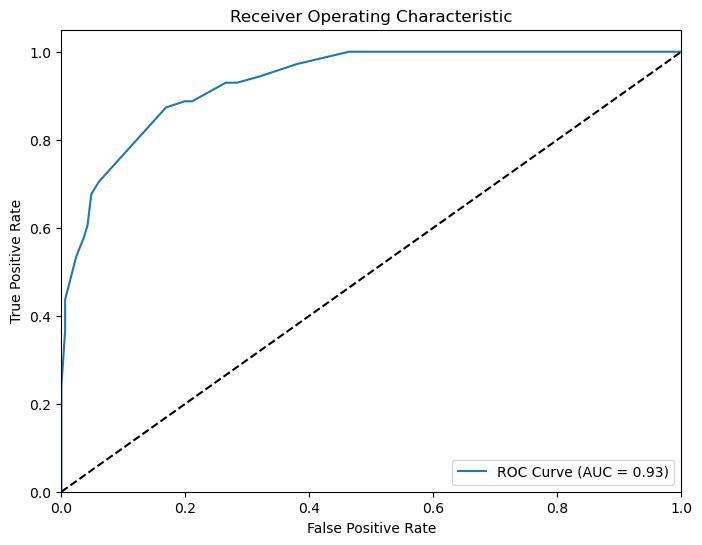

In [31]:
# Compute the ROC curve and area under the curve (AUC)
y_test_prob = tree_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### 6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

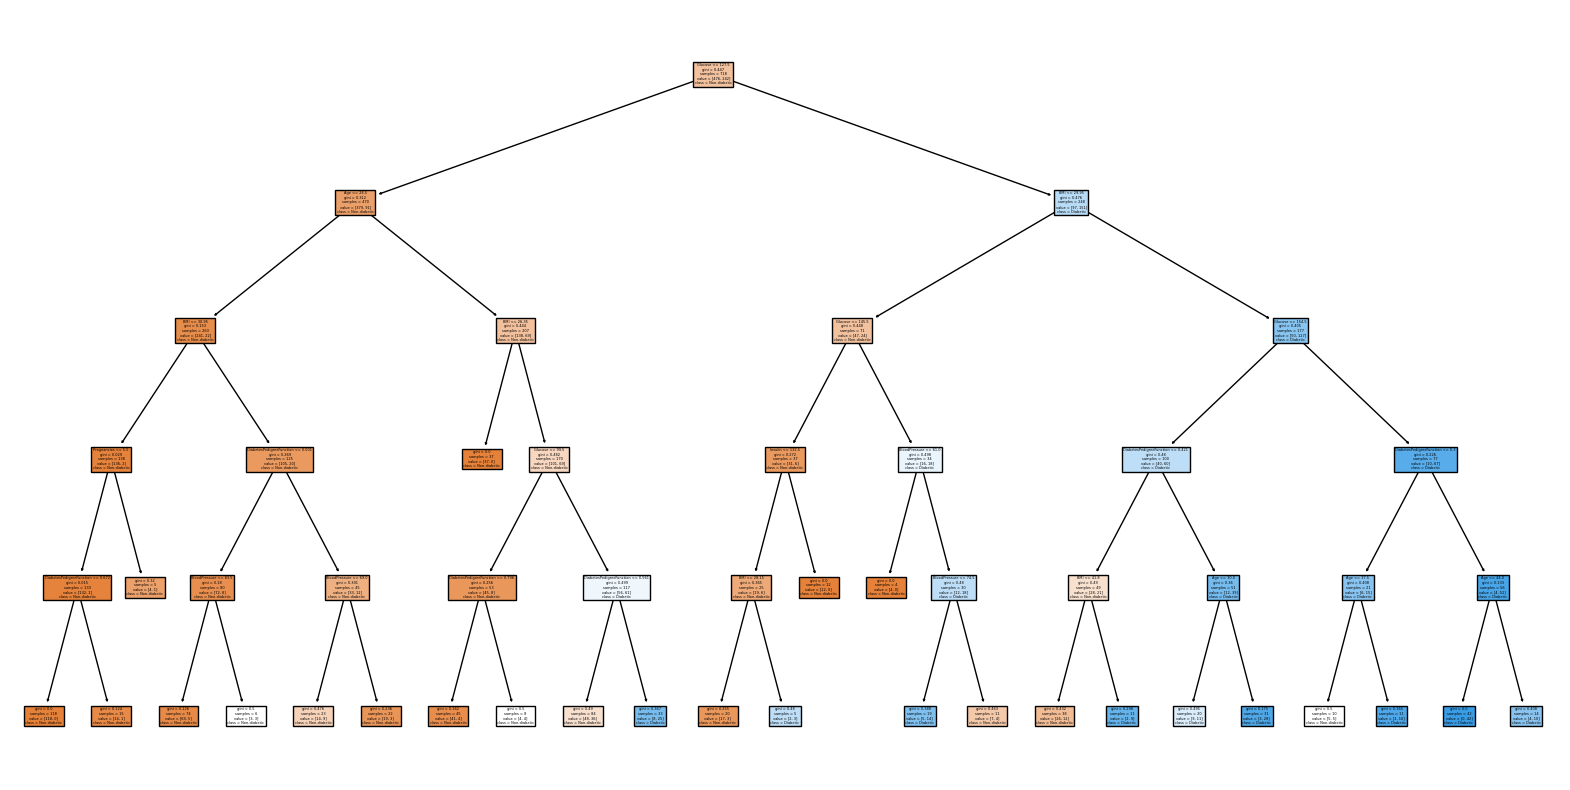

In [28]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier(**best_hyperparameters)

# Train the decision tree model using the best hyperparameters on the full training set
tree_classifier.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, feature_names=X.columns, class_names=["Non-diabetic", "Diabetic"], filled=True)
plt.show()

In [33]:
imp = best_model.feature_importances_
imp = pd.Series(imp)
imp.index = X_train.columns
imp = imp.sort_values(ascending=False)
imp

Glucose                     0.491611
BMI                         0.212327
Age                         0.133498
DiabetesPedigreeFunction    0.103218
BloodPressure               0.051116
Insulin                     0.005954
Pregnancies                 0.002276
SkinThickness               0.000000
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances'}, ylabel='Importance'>

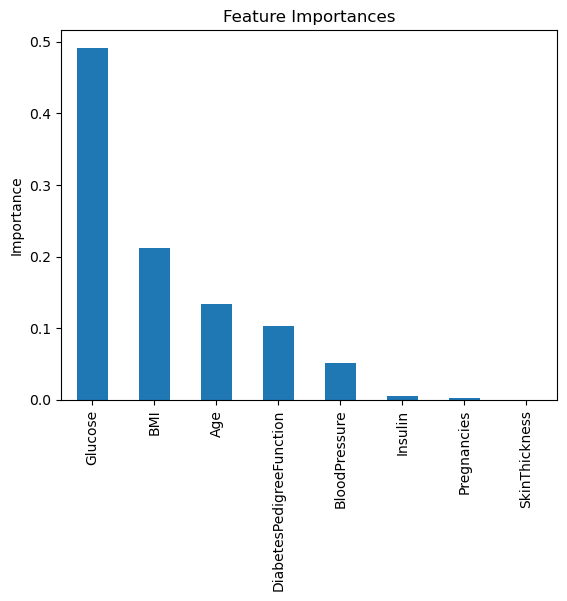

In [34]:
imp.plot(kind='bar',ylabel='Importance',title='Feature Importances')

Top 4 most important Features for Predicting Diabetes are :

1.Glucose

2.BMI

3.Age

4.Diabetes Pedegree Function

### 7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [35]:
patient_data = {
    'Pregnancies':[2],
    'Glucose':[150],
    'BloodPressure':[90],
    'SkinThickness':[49],
    'Insulin':[510],
    'BMI':[40],
    'DiabetesPedigreeFunction':[0.189],
    'Age':[60]
}

In [36]:
df_data = pd.DataFrame(patient_data)
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,150,90,49,510,40,0.189,60


In [37]:
pred = best_model.predict(df_data)[0]
pred

0

In [40]:
if pred==1:
    print('Patient is Diabetic')
    print(f'Probbaibility of diabetic : {best_model.predict_proba(df_data)[0][1]}')
else:
    print('Patient is non Diabetic')
    print(f'Probaibility of diabetic : {best_model.predict_proba(df_data)[0][1]}')

Patient is non Diabetic
Probaibility of diabetic : 0.3157894736842105


False Negatives are dangerous in this model because Patient is actually having diabetes and we predicted not having . This can lead to major health problems to the patient.